# Wine Clustering Dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import sklearn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('wine-clustering.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
data.shape

(178, 13)

In [6]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


## Univariate and Bivariate Analysis

In [8]:
data.describe(include='all')

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [10]:
data.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


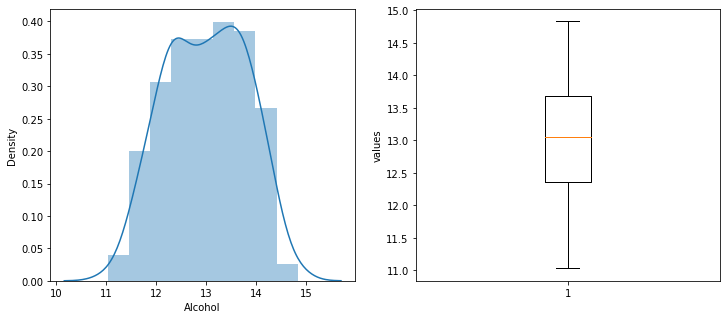

In [11]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(data['Alcohol'])
fig.add_subplot(1,2,2)
plt.boxplot(data['Alcohol'])
plt.ylabel('values')
plt.show()

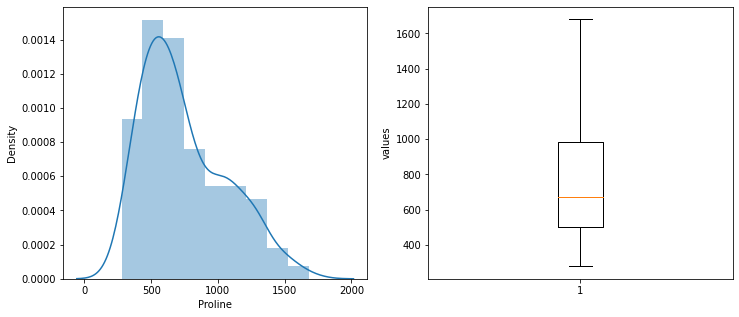

In [12]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1,2,1)
sns.distplot(data['Proline'])
fig.add_subplot(1,2,2)
plt.boxplot(data['Proline'])
plt.ylabel('values')
plt.show()

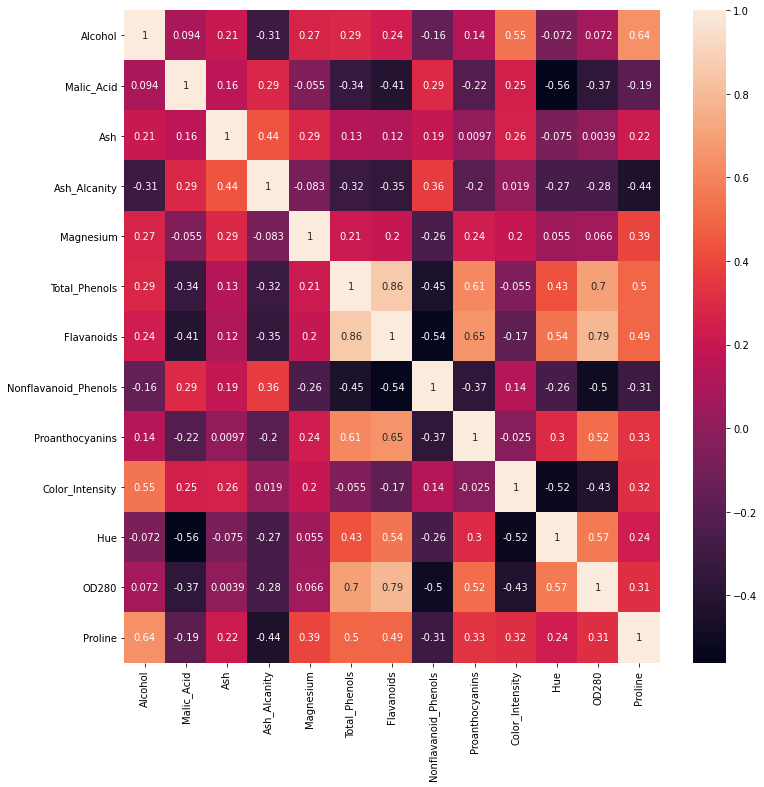

In [13]:
cor = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True)

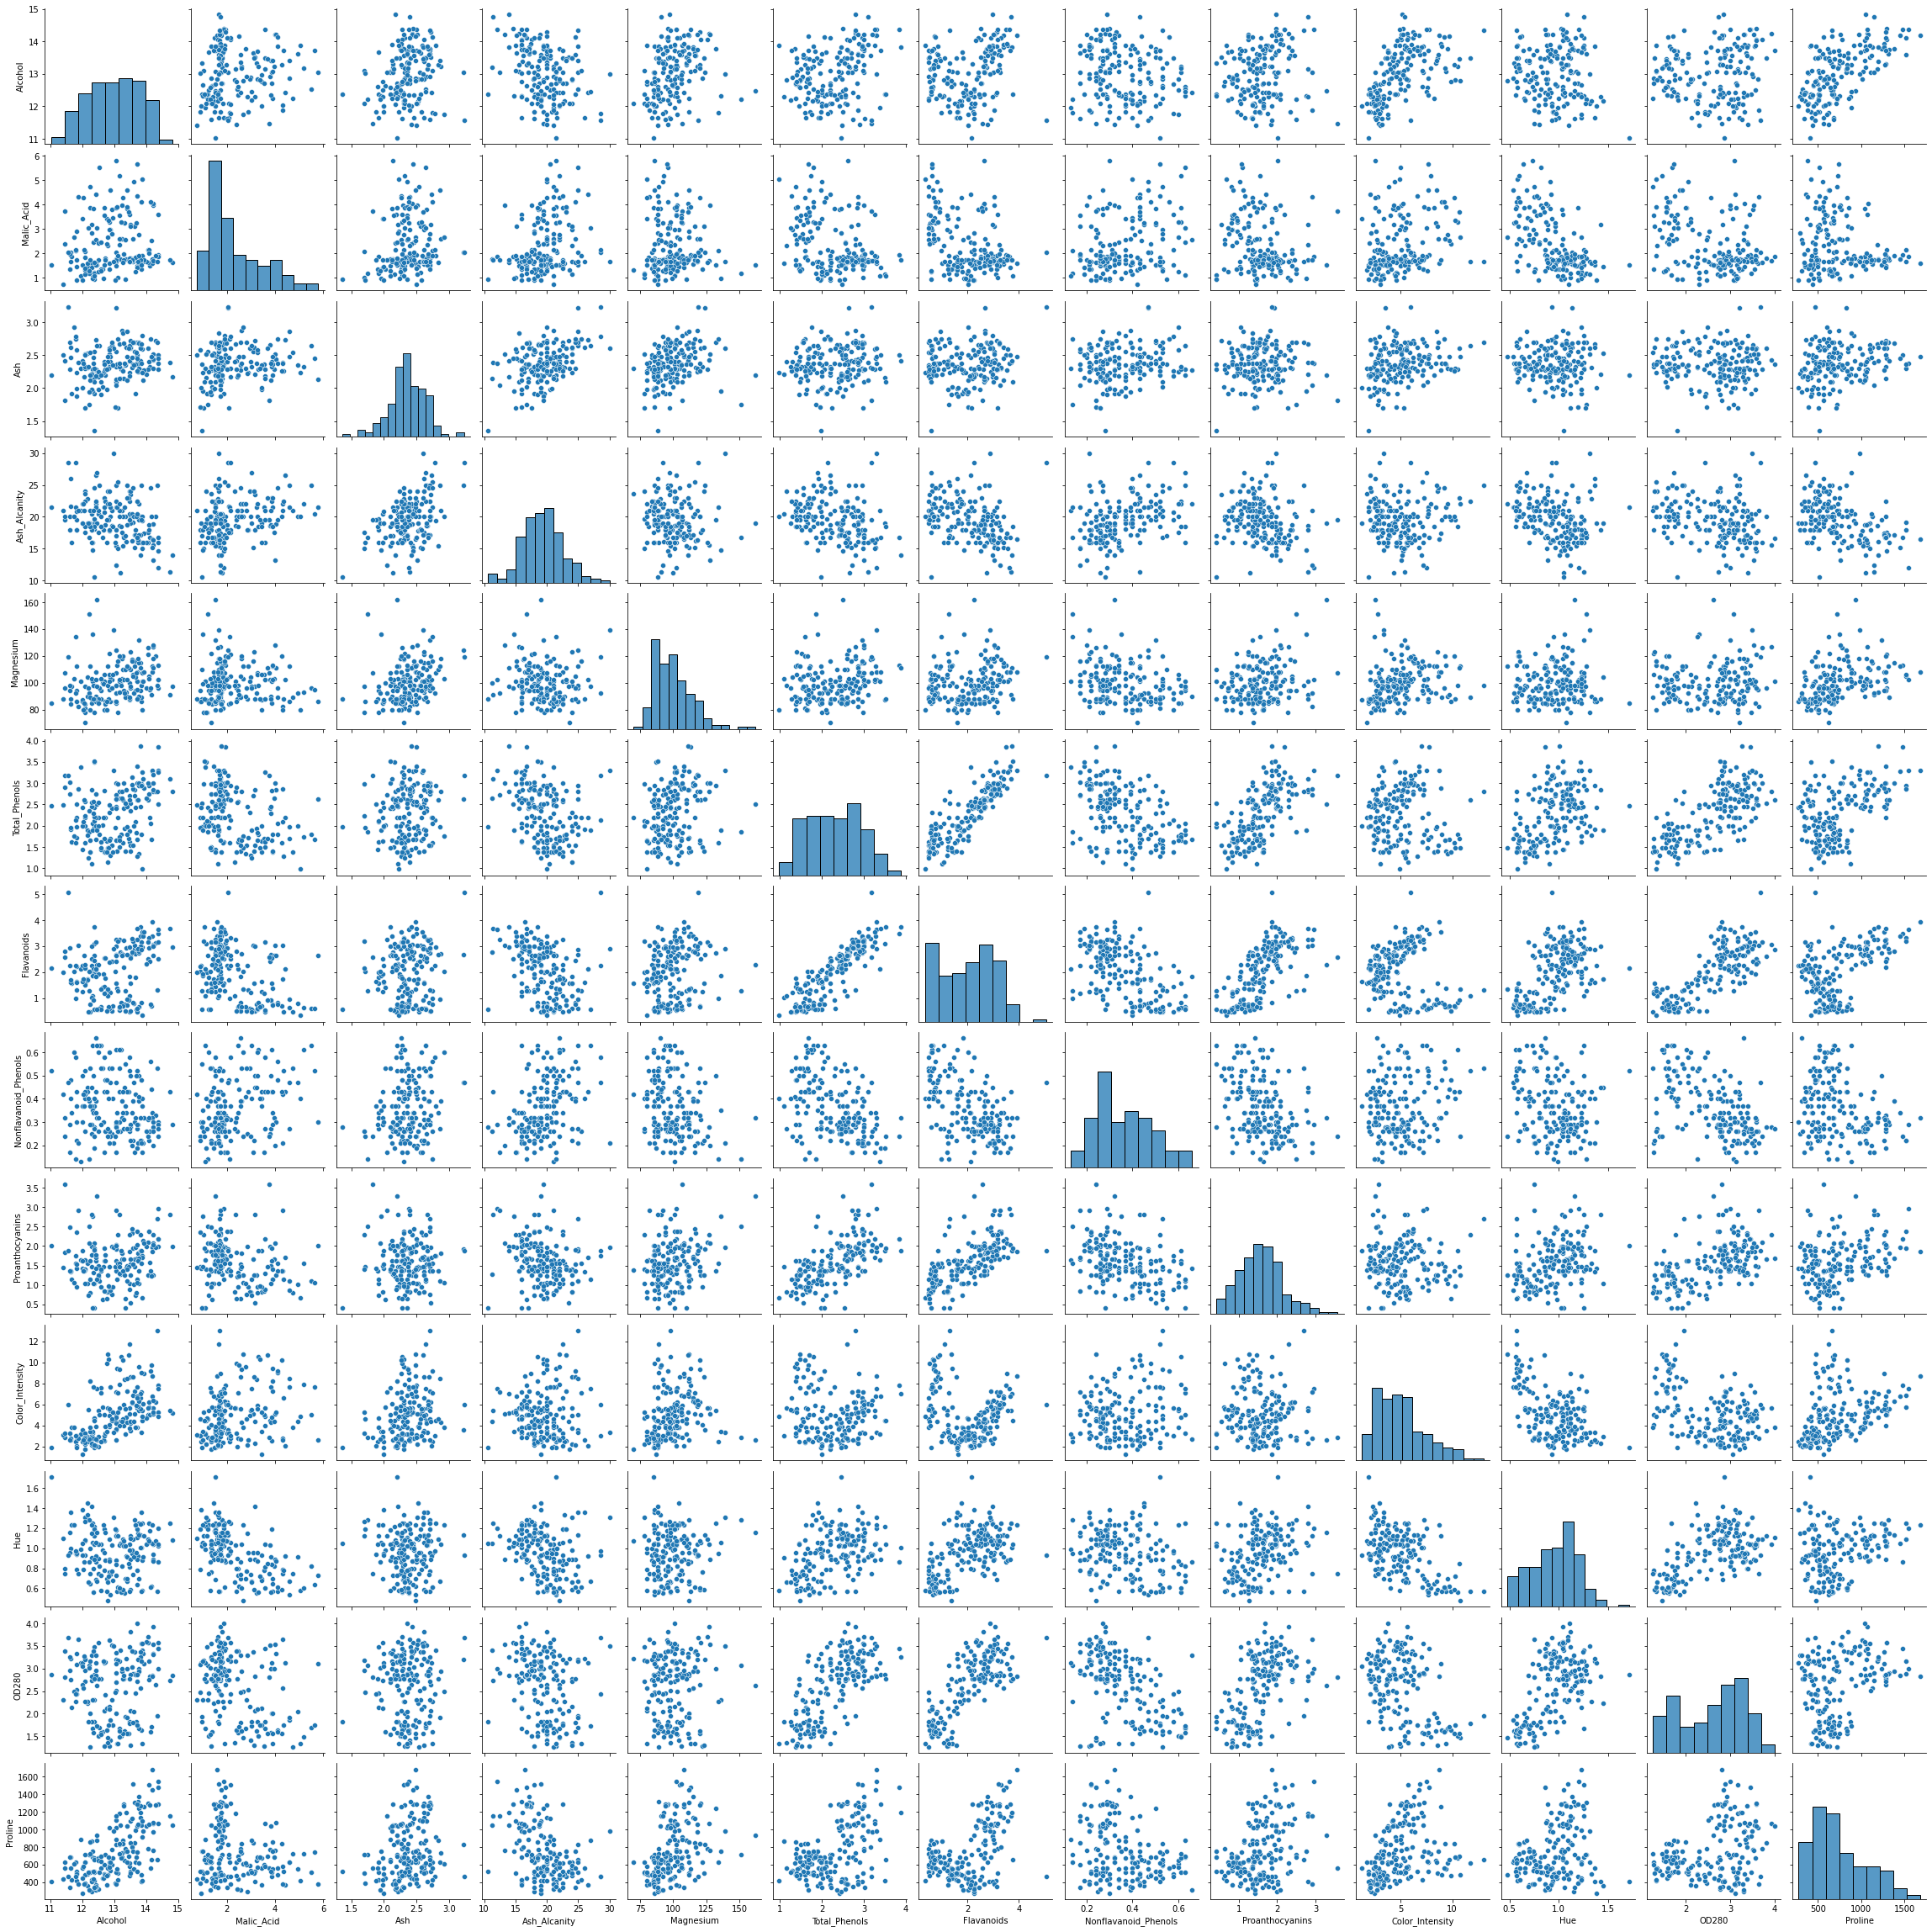

In [14]:
sns.pairplot(data)

In [15]:
modeldata = pd.DataFrame()
modeldata['Alcohol'] = data['Alcohol']
modeldata['Proline'] = data['Proline']

In [16]:
modeldata.columns

Index(['Alcohol', 'Proline'], dtype='object')

In [17]:
modeldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Alcohol  178 non-null    float64
 1   Proline  178 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.9 KB


In [18]:
modeldata.shape

(178, 2)

In [19]:
modeldata.head()

,Alcohol,Proline
0,14.23,1065
1,13.20,1050
2,13.16,1185
3,14.37,1480
4,13.24,735


### Preprocessing

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
modeldata = pd.DataFrame(scaler.fit_transform(modeldata), columns=['Alcohol', 'Proline'])

## Creating the Model

### Default Values

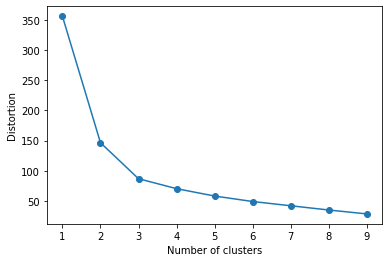

In [21]:
from sklearn.cluster import KMeans

distortions = []

for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(modeldata)
    distortions.append(km.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [22]:
km = KMeans(n_clusters=3)
km.fit_predict(modeldata)

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [23]:
y_km = km.fit_predict(modeldata)

In [24]:
modeldata = pd.DataFrame(modeldata)
modeldata['y_km'] = y_km

In [25]:
modeldata.head()

,Alcohol,Proline,y_km
0,1.518613,1.013009,2
1,0.246290,0.965242,2
2,0.196879,1.395148,2
3,1.691550,2.334574,2
4,0.295700,-0.037874,0


In [26]:
y_km

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0], dtype=int32)

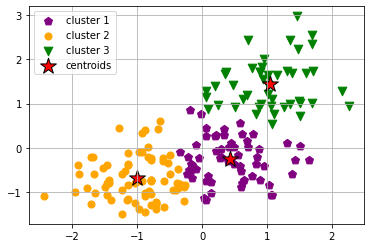

In [27]:
plt.scatter(modeldata[modeldata['y_km']==0]['Alcohol'],modeldata[modeldata['y_km']==0]['Proline'], s=70, c='purple', marker='p', label='cluster 1')

plt.scatter(modeldata[modeldata['y_km']==1]['Alcohol'],modeldata[modeldata['y_km']==1]['Proline'], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(modeldata[modeldata['y_km']==2]['Alcohol'],modeldata[modeldata['y_km']==2]['Proline'], s=75, c='green', marker='v', label='cluster 3')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [28]:
pd.DataFrame(km.cluster_centers_)

,0,1
0,0.434720,-0.263217
1,-1.008097,-0.691568
2,1.042230,1.435093


In [29]:
km.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [30]:
km.inertia_

86.95829610751915

In [31]:
km.n_iter_

8

### With Different parameter values

#### Init Value as random

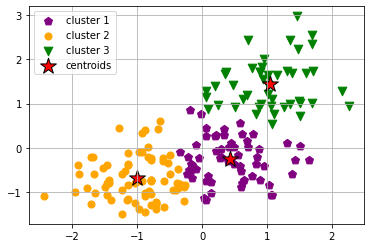

In [32]:
modeldata.drop(columns=['y_km'], inplace=True)
km = KMeans(n_clusters=3, init='random')
km.fit(modeldata)

y_km = km.fit_predict(modeldata)

modeldata = pd.DataFrame(modeldata)
modeldata['y_km'] = y_km

plt.scatter(modeldata[modeldata['y_km']==0]['Alcohol'],modeldata[modeldata['y_km']==0]['Proline'], s=70, c='purple', marker='p', label='cluster 1')

plt.scatter(modeldata[modeldata['y_km']==1]['Alcohol'],modeldata[modeldata['y_km']==1]['Proline'], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(modeldata[modeldata['y_km']==2]['Alcohol'],modeldata[modeldata['y_km']==2]['Proline'], s=75, c='green', marker='v', label='cluster 3')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [33]:
pd.DataFrame(km.cluster_centers_)

,0,1
0,0.434720,-0.263217
1,-1.008097,-0.691568
2,1.042230,1.435093


#### Init Value as kmean++

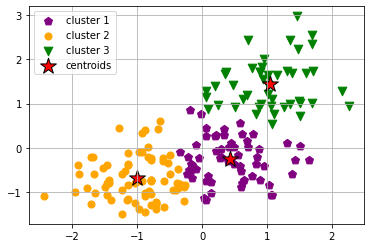

In [34]:
modeldata.drop(columns=['y_km'], inplace=True)
km = KMeans(n_clusters=3, init='k-means++')
km.fit(modeldata)

y_km = km.fit_predict(modeldata)

modeldata = pd.DataFrame(modeldata)
modeldata['y_km'] = y_km

plt.scatter(modeldata[modeldata['y_km']==0]['Alcohol'],modeldata[modeldata['y_km']==0]['Proline'], s=70, c='purple', marker='p', label='cluster 1')

plt.scatter(modeldata[modeldata['y_km']==1]['Alcohol'],modeldata[modeldata['y_km']==1]['Proline'], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(modeldata[modeldata['y_km']==2]['Alcohol'],modeldata[modeldata['y_km']==2]['Proline'], s=75, c='green', marker='v', label='cluster 3')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [35]:
pd.DataFrame(km.cluster_centers_)

,0,1
0,0.434720,-0.263217
1,-1.008097,-0.691568
2,1.042230,1.435093


### N init value

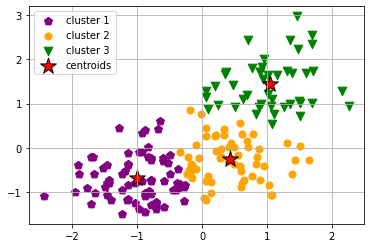

In [36]:
modeldata.drop(columns=['y_km'], inplace=True)
km = KMeans(n_clusters=3, init='random', n_init=100)
km.fit(modeldata)

y_km = km.fit_predict(modeldata)

modeldata = pd.DataFrame(modeldata)
modeldata['y_km'] = y_km

plt.scatter(modeldata[modeldata['y_km']==0]['Alcohol'],modeldata[modeldata['y_km']==0]['Proline'], s=70, c='purple', marker='p', label='cluster 1')

plt.scatter(modeldata[modeldata['y_km']==1]['Alcohol'],modeldata[modeldata['y_km']==1]['Proline'], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(modeldata[modeldata['y_km']==2]['Alcohol'],modeldata[modeldata['y_km']==2]['Proline'], s=75, c='green', marker='v', label='cluster 3')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [37]:
pd.DataFrame(km.cluster_centers_)

,0,1
0,-1.008097,-0.691568
1,0.434720,-0.263217
2,1.042230,1.435093


### Max iter

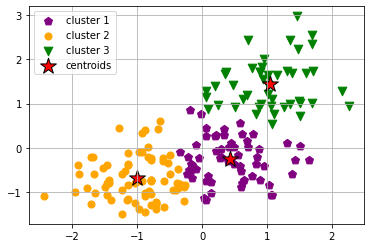

In [38]:
modeldata.drop(columns=['y_km'], inplace=True)
km = KMeans(n_clusters=3, init='random', n_init=100, max_iter=500)
km.fit(modeldata)

y_km = km.fit_predict(modeldata)

modeldata = pd.DataFrame(modeldata)
modeldata['y_km'] = y_km

plt.scatter(modeldata[modeldata['y_km']==0]['Alcohol'],modeldata[modeldata['y_km']==0]['Proline'], s=70, c='purple', marker='p', label='cluster 1')

plt.scatter(modeldata[modeldata['y_km']==1]['Alcohol'],modeldata[modeldata['y_km']==1]['Proline'], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(modeldata[modeldata['y_km']==2]['Alcohol'],modeldata[modeldata['y_km']==2]['Proline'], s=75, c='green', marker='v', label='cluster 3')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [39]:
pd.DataFrame(km.cluster_centers_)

,0,1
0,0.434720,-0.263217
1,-1.008097,-0.691568
2,1.042230,1.435093


### Tol

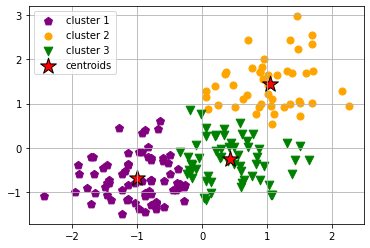

In [40]:
modeldata.drop(columns=['y_km'], inplace=True)
km = KMeans(n_clusters=3, tol=0.000001)
km.fit(modeldata)

y_km = km.fit_predict(modeldata)

modeldata = pd.DataFrame(modeldata)
modeldata['y_km'] = y_km

plt.scatter(modeldata[modeldata['y_km']==0]['Alcohol'],modeldata[modeldata['y_km']==0]['Proline'], s=70, c='purple', marker='p', label='cluster 1')

plt.scatter(modeldata[modeldata['y_km']==1]['Alcohol'],modeldata[modeldata['y_km']==1]['Proline'], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(modeldata[modeldata['y_km']==2]['Alcohol'],modeldata[modeldata['y_km']==2]['Proline'], s=75, c='green', marker='v', label='cluster 3')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [41]:
pd.DataFrame(km.cluster_centers_)

,0,1
0,-1.008097,-0.691568
1,1.042230,1.435093
2,0.434720,-0.263217


### Auto algorithm

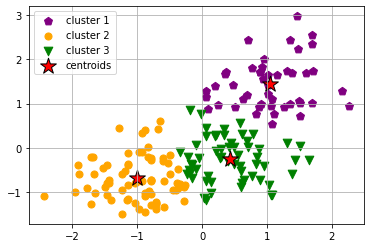

In [42]:
modeldata.drop(columns=['y_km'], inplace=True)
km = KMeans(n_clusters=3, algorithm='auto')
km.fit(modeldata)

y_km = km.fit_predict(modeldata)

modeldata = pd.DataFrame(modeldata)
modeldata['y_km'] = y_km

plt.scatter(modeldata[modeldata['y_km']==0]['Alcohol'],modeldata[modeldata['y_km']==0]['Proline'], s=70, c='purple', marker='p', label='cluster 1')

plt.scatter(modeldata[modeldata['y_km']==1]['Alcohol'],modeldata[modeldata['y_km']==1]['Proline'], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(modeldata[modeldata['y_km']==2]['Alcohol'],modeldata[modeldata['y_km']==2]['Proline'], s=75, c='green', marker='v', label='cluster 3')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [43]:
pd.DataFrame(km.cluster_centers_)

,0,1
0,1.042230,1.435093
1,-1.008097,-0.691568
2,0.434720,-0.263217


### Full algorithm

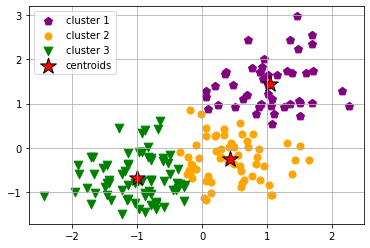

In [44]:
modeldata.drop(columns=['y_km'], inplace=True)
km = KMeans(n_clusters=3, algorithm='full')
km.fit(modeldata)

y_km = km.fit_predict(modeldata)

modeldata = pd.DataFrame(modeldata)
modeldata['y_km'] = y_km

plt.scatter(modeldata[modeldata['y_km']==0]['Alcohol'],modeldata[modeldata['y_km']==0]['Proline'], s=70, c='purple', marker='p', label='cluster 1')

plt.scatter(modeldata[modeldata['y_km']==1]['Alcohol'],modeldata[modeldata['y_km']==1]['Proline'], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(modeldata[modeldata['y_km']==2]['Alcohol'],modeldata[modeldata['y_km']==2]['Proline'], s=75, c='green', marker='v', label='cluster 3')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [45]:
pd.DataFrame(km.cluster_centers_)

,0,1
0,1.042230,1.435093
1,0.434720,-0.263217
2,-1.008097,-0.691568


### Elkan algorithm

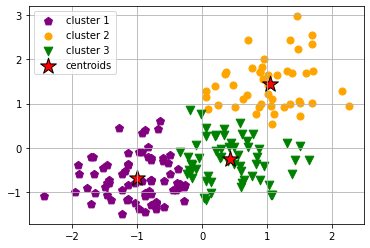

In [46]:
modeldata.drop(columns=['y_km'], inplace=True)
km = KMeans(n_clusters=3, algorithm='elkan')
km.fit(modeldata)

y_km = km.fit_predict(modeldata)

modeldata = pd.DataFrame(modeldata)
modeldata['y_km'] = y_km

plt.scatter(modeldata[modeldata['y_km']==0]['Alcohol'],modeldata[modeldata['y_km']==0]['Proline'], s=70, c='purple', marker='p', label='cluster 1')

plt.scatter(modeldata[modeldata['y_km']==1]['Alcohol'],modeldata[modeldata['y_km']==1]['Proline'], s=50, c='orange', marker='o', label='cluster 2')

plt.scatter(modeldata[modeldata['y_km']==2]['Alcohol'],modeldata[modeldata['y_km']==2]['Proline'], s=75, c='green', marker='v', label='cluster 3')

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [47]:
pd.DataFrame(km.cluster_centers_)

,0,1
0,-1.008097,-0.691568
1,1.042230,1.435093
2,0.434720,-0.263217


### 3d Plot

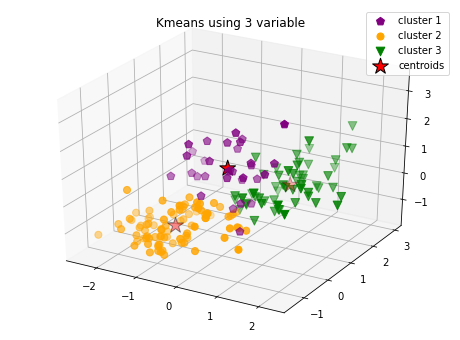

In [48]:
del modeldata
scaler = StandardScaler()
modeldata = pd.DataFrame(scaler.fit_transform(data[['Alcohol', 'Proline','Color_Intensity']]), columns=['Alcohol', 'Proline','Color_Intensity'])
km = KMeans(n_clusters=3, algorithm='elkan')
km.fit(modeldata)

y_km = km.fit_predict(modeldata)

modeldata = pd.DataFrame(modeldata)
modeldata['y_km'] = y_km

fig = plt.figure(figsize = (8, 6))
ax = plt.axes(projection ="3d")

ax.scatter3D(modeldata[modeldata['y_km']==0]['Alcohol'],modeldata[modeldata['y_km']==0]['Proline'], modeldata[modeldata['y_km']==0]['Color_Intensity'], s=70, c='purple', marker='p', label='cluster 1')

ax.scatter3D(modeldata[modeldata['y_km']==1]['Alcohol'],modeldata[modeldata['y_km']==1]['Proline'], modeldata[modeldata['y_km']==1]['Color_Intensity'], s=50, c='orange', marker='o', label='cluster 2')

ax.scatter3D(modeldata[modeldata['y_km']==2]['Alcohol'],modeldata[modeldata['y_km']==2]['Proline'], modeldata[modeldata['y_km']==2]['Color_Intensity'], s=75, c='green', marker='v', label='cluster 3')

ax.scatter3D(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2],
    s=275, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.title('Kmeans using 3 variable')
plt.grid()
plt.show()

## Inference

We have selected the wines dataset for the clustering. It will combine the entires into similar category. There are 12 columns in the dataset and we will be using only 2 and 3 columns for the processing to make the process more clear and easy to understand. Univariate and Bivariate Analysis is done on the dataset for understanding. Data is normalized so that the centroid values come in a proper range. Different values for k are used and we identify 3 as the best answer using the elbow method. For better understanding, we tried different values for parameters to check that it leads to change in the centroid value or not but it doesn't affects the centroid value much. The dataset can be divided into 3 different clusters as identified by the k-means clustering.